In [1]:
import sys

In [2]:
from pycmg.configuration import Configuration
from pycmg.visualization import export_data, visualize_sections
from pycmg.generate_mesostructure import Mesostructure
import numpy as np
import os
join = os.path.join


In [3]:
# take 

Configuration 1 is assembled with volume fraction 0.3061552734375


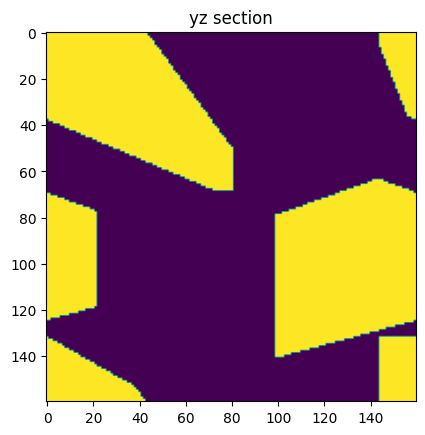

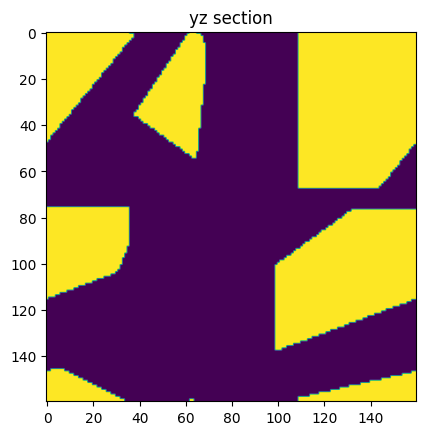

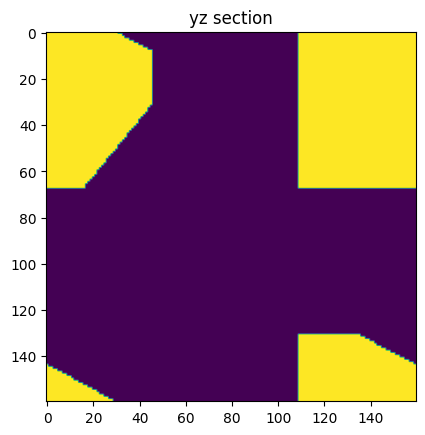

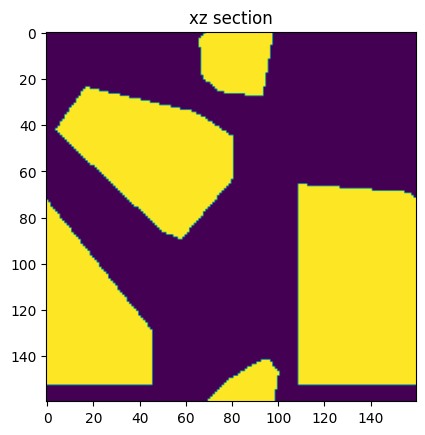

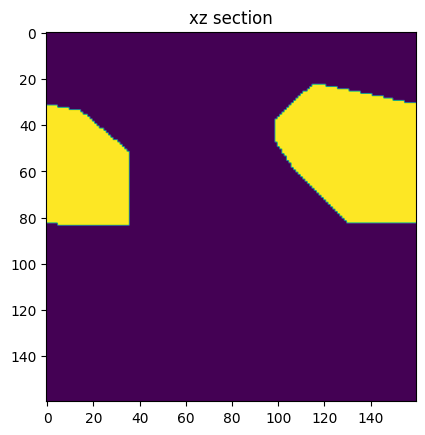

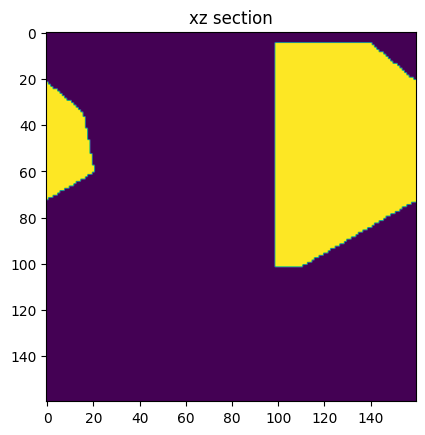

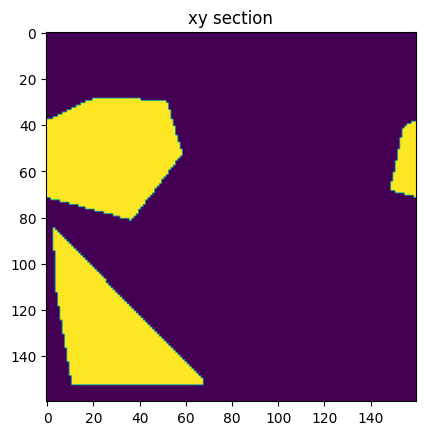

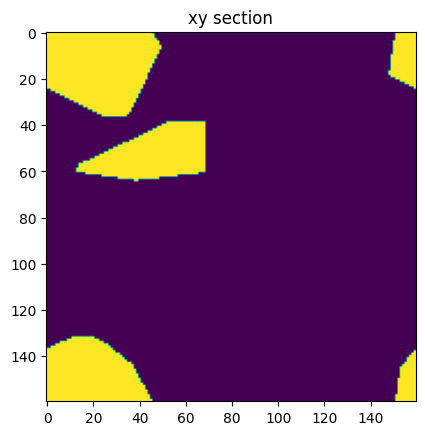

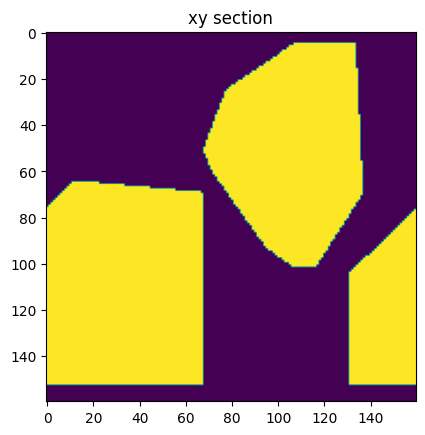

In [4]:
my_configuration = Configuration(vf_max_assembly=0.3, 
                                 average_shape=[1, 0.5, 0.5])

AB8_file = join("..","src",
                "dependencies",
                "pycmg",
                "examples",
                "AB8_CMG_full.csv")

my_configuration.load_inclusions(conf_csv=AB8_file)
my_mesostructure = Mesostructure(mesostructure_size=[20, 20, 20], 
                                 resolution=[0.125, 0.125, 0.125])
my_mesostructure.add_configuration(my_configuration)
my_virtual_mesostructure = my_mesostructure.assemble_sra()
np.save('mesostructure.npy', my_virtual_mesostructure)    # .npy extension is added if not given
visualize_sections(my_virtual_mesostructure, 3)
export_data(my_virtual_mesostructure, 'vtk', 'mesostructure.vti')

In [5]:

import numpy as np
from skimage import measure
import trimesh


def frommatrix2stl(matrix, filename,target_faces=None):

    matrix = matrix.copy()

    matrix = np.pad(matrix, 1, mode='constant', constant_values=0)

    matrix[0, :, :] = 1
    matrix[-1, :, :] = 1
    matrix[:, 0, :] = 1
    matrix[:, -1, :] = 1
    matrix[:, :, 0] = 1
    matrix[:, :, -1] = 1

    verts, faces, normals, values = measure.marching_cubes(matrix, level=0.5)
    mesh = trimesh.Trimesh(vertices=verts, faces=faces)

    # Simplificación de la malla si se especifica un número objetivo de caras
    if target_faces:
        mesh = mesh.simplify_quadric_decimation(target_faces)

    mesh.export(filename)

In [6]:
import shutil,os

In [7]:
#rm *stl
try:
    os.remove('mesostructure.stl')
    os.remove('mesostructure_anti.stl')
except:
    pass

In [8]:


my_virtual_mesostructure_anti = 1 - my_virtual_mesostructure


frommatrix2stl(my_virtual_mesostructure_anti, 'mesostructure_anti.stl', target_faces=2000)
frommatrix2stl(my_virtual_mesostructure, 'mesostructure.stl', target_faces=2000)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
